# Imports and Final Model Fitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('cleaned_ped_data.csv').drop('Unnamed: 0', axis=1)
#X = pd.read_csv('X.csv').drop('Unnamed: 0', axis=1)
#y = pd.read_csv('y.csv').drop('Unnamed: 0', axis=1)
#df = pd.concat([X, y])

# X_train = pd.read_csv('X_train.csv').drop('Unnamed: 0', axis=1)
# y_train = pd.read_csv('y_train_ez.csv').drop('Unnamed: 0', axis=1).iloc[:,0]

In [3]:
X_test = pd.read_csv('X_test.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('y_test_ez.csv').drop('Unnamed: 0', axis=1).iloc[:,0]

In [1179]:
df = pd.read_csv('ped2.csv').drop('Unnamed: 0', axis=1)

encoding = {'O': 0,
            'C': 0,
            'B': 0,
            'A': 1,
            'K': 1}

df['CrashSevr'] = df['CrashSevr'].apply(lambda x: x[0]).map(encoding)

In [54]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [146]:
model = joblib.load('rscv_gbc20_accuracy.pkl')

In [1174]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.69      0.79      7121
           1       0.29      0.76      0.42      1215

    accuracy                           0.70      8336
   macro avg       0.62      0.72      0.61      8336
weighted avg       0.85      0.70      0.74      8336



# Data Set Pre-Prediction Graphs

In [126]:
ped = pd.read_csv('ped_eda.csv', low_memory=False).drop('Unnamed: 0', axis=1)

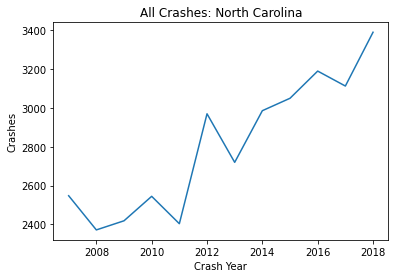

In [1160]:
year_data = ped.groupby('CrashYear').agg('count').iloc[:,0]
sns.lineplot(data = year_data)
plt.xlabel('Crash Year')
plt.ylabel('Crashes')
plt.title('All Crashes: North Carolina')
plt.savefig('NC Crashes.png')

Plotting by month reveals a typical periodic time series

Text(0.5, 1.0, 'All Crashes: North Carolina')

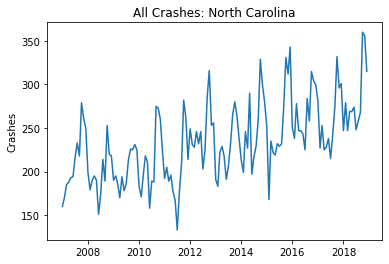

In [229]:
data = ped.groupby(['CrashYear', 'CrashMonth']).agg('count').iloc[:,0]

date = data.index[0][1] + "-" + str(int(data.index[0][0]))
pd.to_datetime(date)

index = [x[1]+'-'+str(int(x[0])) for x in data.index]
index = pd.to_datetime(index)
data.index = index
"""
period = 3
moving_average = [(data[i-2] + data[i-1] + data[i])/3 for i in range(2,len(data))]
"""
sns.lineplot(data=data)
plt.ylabel('Crashes')
plt.title('All Crashes: North Carolina')

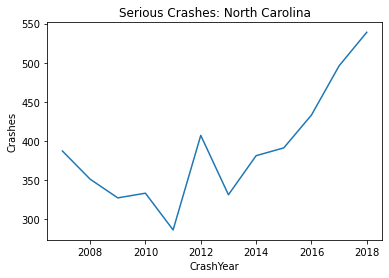

In [305]:
serious = ((ped['CrashSevr'] == 'K: Killed') | (ped['CrashSevr'] == 'A: Suspected Serious Injury'))
year_data_serious = ped[serious].groupby('CrashYear').agg('count').iloc[:,0]
sns.lineplot(data = year_data_serious)
plt.ylabel('Crashes')
plt.title('Serious Crashes: North Carolina')
plt.savefig('Serious NC Crashes.png')

## Chapel Hill

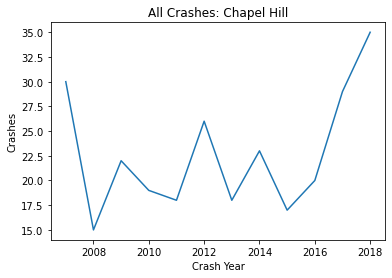

In [1161]:
ch = ped[ped.City=='Chapel Hill'].groupby('CrashYear').agg('count').iloc[:,0]
sns.lineplot(data=ch)
plt.xlabel('Crash Year')
plt.ylabel('Crashes')
plt.title('All Crashes: Chapel Hill')
plt.savefig('CH Crashes.png')

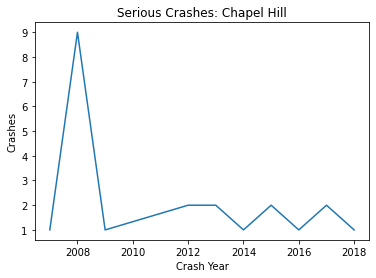

In [1163]:
serious = ((ped['CrashSevr'] == 'K: Killed') | (ped['CrashSevr'] == 'A: Suspected Serious Injury'))
ch_serious = ped[serious & (ped.City == 'Chapel Hill')].groupby('CrashYear').agg('count').iloc[:,0]
sns.lineplot(data = ch_serious)
plt.xlabel('Crash Year')
plt.ylabel('Crashes')
plt.title('Serious Crashes: Chapel Hill')
plt.savefig('CH Serious')

In [185]:
ch = df[df.City == 'Chapel Hill']

In [11]:
ch.columns

Index(['City', 'AmbulanceR', 'DrvrAlcDrg', 'CrashMonth', 'CrashDay',
       'CrashHour', 'CrashSevr', 'DrvrAgeGrp', 'DrvrInjury', 'DrvrVehTyp',
       'HitRun', 'LightCond', 'PedAgeGrp', 'PedAlcDrg', 'RdClass',
       'SpeedLimit', 'TraffCntrl', 'Weather', 'CityPop'],
      dtype='object')

In [13]:
def encoder(df):
    df0 = df.copy()
    temp0 = df0.pop('City')
    temp1 = df0.pop('CrashSevr')
    df0 = pd.get_dummies(df0)
    df0 = df0.join(temp0)
    df0 = df0.join(temp1)
    return df0

In [14]:
def split(df):
    X = df.copy()
    y = X.pop('CrashSevr')
    return X, y

In [317]:
def encoder2(df):
    df0 = df.copy()
    temp0 = df0.pop('City')
    temp1 = df0.pop('CrashSevr')
    df0.pop('DrvrInjury')
    df0.pop('AmbulanceR')
    df0 = pd.get_dummies(df0)
    df0 = df0.join(temp0)
    df0 = df0.join(temp1)
    return df0

In [318]:
dfe = encoder2(df)

In [319]:
ch_X = dfe[dfe.City == 'Chapel Hill'].drop(['City','CrashSevr'], axis=1)
ch_y = dfe[dfe.City == 'Chapel Hill']['CrashSevr']

In [320]:
ch_X.shape

(271, 56)

In [1028]:
ch_y.value_counts()

0    249
1     22
Name: CrashSevr, dtype: int64

In [1123]:
model = joblib.load('blind.pkl')

In [1125]:
pred = model.predict(ch_X)
print(classification_report(ch_y, pred))
print(pd.Series(pred).value_counts())

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       249
           1       0.35      0.50      0.42        22

    accuracy                           0.89       271
   macro avg       0.65      0.71      0.68       271
weighted avg       0.91      0.89      0.89       271

0    240
1     31
dtype: int64


# Modeling Proposed Changes and expected decrease in serious injuries

In [1126]:
predictions = {}

In [1127]:
che = dfe[dfe.City == 'Chapel Hill']
bootstrap = che.sample(10000, replace = True)

In [1128]:
bs_X = bootstrap.drop(['City', 'CrashSevr'], axis=1)
bs_y = bootstrap.CrashSevr

In [1129]:
pred = model.predict(bs_X)

predictions['baseline'] = pd.Series(pred).value_counts()[1]

### Installing traffic controls where there are none had no effect

In [1130]:
bs_X1 = bs_X.copy()
bs_X1.loc[bs_X1['TraffCntrl'] == 1, 'TraffCntrl'] = 0

In [1131]:
pred = model.predict(bs_X1)

predictions['Installing Traffic Control'] = pd.Series(pred).value_counts()[1]

### Lowering the speed limits of the 30-35 mph zones actually had the opposite effect

In [1132]:
bs_X0 = bs_X.copy()
bs_X0.loc[bs_X['SpeedLimit_30 - 35  MPH'] == 1, 'SpeedLimit_20 - 25  MPH'] = 1
bs_X0.loc[bs_X['SpeedLimit_30 - 35  MPH'] == 1, 'SpeedLimit_30 - 35  MPH'] = 0

In [1133]:
pred = model.predict(bs_X0)

predictions['30 to 20'] = pd.Series(pred).value_counts()[1]

### Decreasing the 40-45 mph speed limits by 10 MPH had the biggest effect

In [1134]:
bs_X2 = bs_X.copy()
bs_X2.loc[bs_X2['SpeedLimit_40 - 45  MPH'] == 1, 'SpeedLimit_30 - 35  MPH'] = 1
bs_X2.loc[bs_X2['SpeedLimit_40 - 45  MPH'] == 1, 'SpeedLimit_40 - 45  MPH'] = 0

In [1135]:
pred = model.predict(bs_X2)

predictions['40 to 30'] = pd.Series(pred).value_counts()[1]

### Checking for aggregate effects

In [1157]:
bs_X3 = bs_X.copy()
bs_X3.loc[bs_X3['SpeedLimit_30 - 35  MPH'] == 1, 'SpeedLimit_20 - 25  MPH'] = 1
bs_X3.loc[bs_X3['SpeedLimit_30 - 35  MPH'] == 1, 'SpeedLimit_30 - 35  MPH'] = 0
bs_X3.loc[bs_X3['TraffCntrl'] == 1, 'TraffCntrl'] = 0
bs_X3.loc[bs_X3['SpeedLimit_40 - 45  MPH'] == 1, 'SpeedLimit_30 - 35  MPH'] = 1
bs_X3.loc[bs_X3['SpeedLimit_40 - 45  MPH'] == 1, 'SpeedLimit_40 - 45  MPH'] = 0

In [1155]:
pred = model.predict(bs_X3)

try: 
    predictions['Slow + Control'] = pd.Series(pred).value_counts()[1]
except KeyError:
    predictions['Slow + Control'] = 0

### Changing Alcohol has little/no effect

In [1138]:
bs_X4 = bs_X.copy()
bs_X4.loc[bs_X4['DrvrAlcDrg'] == 1, 'DrvrAlcDrg'] = 0
pred = model.predict(bs_X4)
predictions['Reduce Drug/Alc'] = pd.Series(pred).value_counts()[1]

### Decreasing young drivers by 20%

In [1139]:
bs_X5 = bs_X.copy()
bs_X5.reset_index(inplace = True, drop = True)
fraction = 0.2
teens = bs_X5['DrvrAgeGrp_0-19'].sum()
undergrad = bs_X5['DrvrAgeGrp_20-24'].sum()
remove_teens = bs_X5.sample(int(teens*fraction), weights=bs_X5['DrvrAgeGrp_0-19']==1)
remove_undergrad = bs_X5.sample(int(undergrad*fraction), weights=bs_X5['DrvrAgeGrp_20-24']==1)
bs_X5.drop(remove_teens.index, inplace = True)
bs_X5.drop(remove_undergrad.index, inplace = True)
bs_X5.shape

(9575, 56)

In [1140]:
pred = model.predict(bs_X5)
predictions['Reduce Young'] = pd.Series(pred).value_counts()[1]

All proposed changes

In [1152]:
bs_all = bs_X5.copy()
bs_all.loc[bs_all['SpeedLimit_30 - 35  MPH'] == 1, 'SpeedLimit_20 - 25  MPH'] = 1
bs_all.loc[bs_all['SpeedLimit_30 - 35  MPH'] == 1, 'SpeedLimit_30 - 35  MPH'] = 0
bs_all.loc[bs_all['TraffCntrl'] == 1, 'TraffCntrl'] = 0
bs_all.loc[bs_all['SpeedLimit_40 - 45  MPH'] == 1, 'SpeedLimit_30 - 35  MPH'] = 1
bs_all.loc[bs_all['SpeedLimit_40 - 45  MPH'] == 1, 'SpeedLimit_40 - 45  MPH'] = 0
bs_all.loc[bs_all['DrvrAlcDrg'] == 1, 'DrvrAlcDrg'] = 0
pred = model.predict(bs_all)
try:
    predictions['All'] = pd.Series(pred).value_counts()[1]
except KeyError:
    predictions['All'] = 0

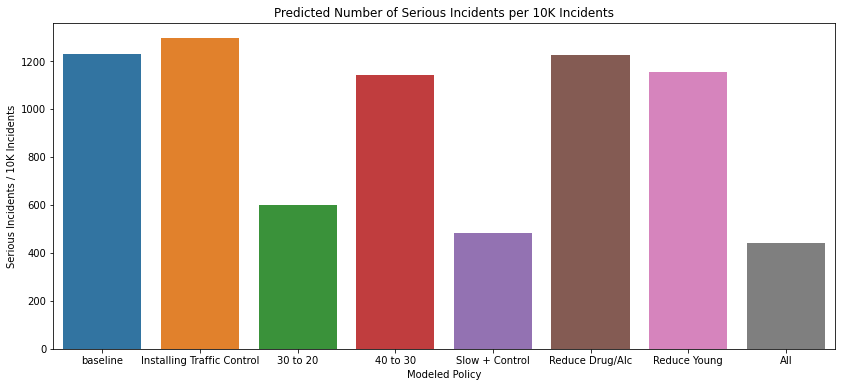

In [1151]:
plt.figure(figsize=(14,6))
sns.barplot(x=list(predictions.keys()), y=list(predictions.values()))
plt.ylabel('Serious Incidents / 10K Incidents')
plt.xlabel('Modeled Policy')
plt.title('Predicted Number of Serious Incidents per 10K Incidents')
plt.savefig('predictions.png')

In [1145]:
predictions

{'baseline': 1229,
 'Installing Traffic Control': 1295,
 '30 to 20': 600,
 '40 to 30': 1140,
 'Slow + Control': 481,
 'Reduce Drug/Alc': 1225,
 'Reduce Young': 1152,
 'All': 471}

In [1158]:
[str(round(predictions[x]/10000*100,3))+'%' for x in predictions.keys()]

['12.29%', '12.95%', '6.0%', '11.4%', '5.11%', '12.25%', '11.52%', '4.54%']

In [1159]:
# Show how traffic control on it's own is bad, but provides a beneficial effect when combined with others.

In [1172]:
bs_stop = bs_X.copy()
bs_stop.loc[bs_stop['SpeedLimit_30 - 35  MPH'] == 1, 'SpeedLimit_20 - 25  MPH'] = 1
bs_stop.loc[bs_stop['SpeedLimit_30 - 35  MPH'] == 1, 'SpeedLimit_30 - 35  MPH'] = 0
#bs_stop.loc[bs_stop['TraffCntrl'] == 1, 'TraffCntrl'] = 0
bs_stop.loc[bs_stop['SpeedLimit_40 - 45  MPH'] == 1, 'SpeedLimit_30 - 35  MPH'] = 1
bs_stop.loc[bs_stop['SpeedLimit_40 - 45  MPH'] == 1, 'SpeedLimit_40 - 45  MPH'] = 0

pred = model.predict(bs_stop)

pd.Series(pred).value_counts()

0    9489
1     511
dtype: int64

In [ ]:
1175
601
511
481